In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import fasttext
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#sidesõnad ja asesõnad
stopsõnad_uus = ['ja', 'ning', 'ega', 'ehk', 'või', 'aga', 'kuid', 'ent', 'vaid', 'et', 'kui', 'kuna', 'sest', 'kuni', 'kuigi', 
             'ehkki', 'nagu', 'saati', 'elik', 'justkui', 'otsekui', 'seni', 'siis', 'ka', 'nii', 'kas',
             'mina', 'ma', 'meie', 'me', 'sina', 'sa', 'teie', 'te', 'tema', 'ta', 'nemad', 'nad',
             'enese', 'enda', 'iseenese', 'iseenda', 'oma', 'üksteise', 'teineteise',
             'see', 'too', 'sama', 'seesama', 'toosama', 'teine', 'muu',
             'niisugune', 'samasugune', 'niisamasugune', 'selline', 'seesugune', 'säärane','säherdune', 
             'taoline', 'selletaoline', 'kes', 'mis', 'kumb', 'missugune', 'milline', 'misuke', 'mitu', 'mitmes', 'mitmendik',
             'ise', 'oma', 'iga', 'igaüks', 'igamees', 'kõik', 'mõlemad', 'kumbki', 'emb-kumb', 'kogu', 'terve',
             'keegi', 'miski', 'mingi', 'mingisugune', 'miskisugune', 'ükski', 'mitu', 'mitmes',
             'mõni', 'mõningane', 'paljud', 'üks', 'teine', 'oma', 'enese', 'enda', 'omaenese', 'omaenda', 'iseoma', 
             'iseenese', 'iseenda', 'emb', 'mõlema', 'palju', '-']

In [3]:
stop_tekst = []
with open("stop_s.txt", "r", encoding = 'utf8') as file:
    for line in file:
        #print(line.rstrip())
        stop_tekst.append(line.rstrip())

In [4]:
len(stop_tekst)

5001

In [5]:
# Veamaatriks (plot the confusion matrix)
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Segadusmaatriks',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normaliseeritud segadusmaatriks")
    else:
        print('Normaliseerimata segadusmaatriks')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    
    plt.ylabel('Tõeline märgend')
    plt.xlabel('Prognoositud märgend')

In [6]:
data = pd.read_excel('toofailid/DATA_TEKSTIKOGU_puhastatud.xlsx', engine='openpyxl')
print(data.shape)

(636, 55)


In [7]:
label = data['Lahendi liik'].to_list()
labels = data.iloc[:, 16].apply(lambda x: '__label__' + str(x))

In [8]:
data.insert(1, "label", labels)

In [9]:
pr = data['text_lemmatize'].to_list()

In [10]:
len(pr)

636

In [11]:
artiklid = []
for i in range(len(pr)):
    art = []
    for el in pr[i].split():
        #print(el)
        if el not in stop_tekst:
            #print(el)
            art.append(el)
        artikkel = ' '.join(art)
    artiklid.append(artikkel)

In [12]:
data['text_lemmatize_stop'] = artiklid

In [13]:
len(artiklid)

636

In [14]:
X = data['text_lemmatize_stop']
y = data['label']
train_df, test_df, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [15]:
train_df

31     kohus arutama põhjalikult fekaalid määrima too...
427    klient leidma swedbank võlgu nõudma arvestama ...
610    poliitik kahetsusväärne olukord tapp suurtükiv...
499    lood ilmumine postimees tõenäoliselt kohus end...
105    patsient ilukliinik suur ootus juhtuma täituma...
                             ...                        
198    huvi tundma pärit keel ütlema väänduma peipsiä...
93     kolm sõbranna mööduma neljapäev õhtu tallinna ...
54     metsatööstur lageraie vajalikkus jutlustama ee...
356    tunduma keskerakond iseenesestmõistetav erakon...
489    kohtulugu • eile tartu ringkonnakohus toimuma ...
Name: text_lemmatize_stop, Length: 508, dtype: object

In [16]:
# Treenimisandmestik tekstifaili
#train = train_df.to_list()
#train_label = y_train.to_list()
#tekstid = list(map(lambda x, y: x+ ' ' +y, train_label, train))
tekstid = list(map(lambda x, y: x+ ' ' +y, y_train, train_df))
textfile = open('train_lemma_stop.txt', "w", encoding = 'utf8')
for element in tekstid:
    textfile.write(element + "\n")
textfile.close()

In [17]:
# Testandmestik tekstifaili
#train = train_df.to_list()
#train_label = y_train.to_list()
#tekstid = list(map(lambda x, y: x+ ' ' +y, train_label, train))
tekstid = list(map(lambda x, y: x+ ' ' +y, y_test, test_df))
textfile = open('test_lemma_stop.txt', "w", encoding = 'utf8')
for element in tekstid:
    textfile.write(element + "\n")
textfile.close()

In [18]:
model1 = fasttext.train_supervised(input = 'train_lemma_stop.txt',
                                  epoch=25, 
                                  lr = 0.5,
                                  #wordNgrams=2,
                                  #loss='hs',
                                  #bucket=200000,
                                  dim = 300)

In [19]:
# Mudeli põhjal test-andmestiku väärtuste prognoosimine
y_pred1 = []
for t in test_df:
    ennustus = model1.predict(t)[0][0]
    y_pred1.append(ennustus)

                        precision    recall  f1-score   support

       __label__tauniv       0.61      0.40      0.48        58
__label__õigeksmõistev       0.61      0.79      0.69        70

             micro avg       0.61      0.61      0.61       128
             macro avg       0.61      0.59      0.58       128
          weighted avg       0.61      0.61      0.59       128

Normaliseerimata segadusmaatriks


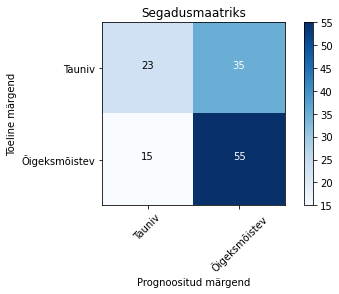

In [20]:
print(classification_report(y_test, y_pred1))
cm = metrics.confusion_matrix(y_test, y_pred1)
plot_confusion_matrix(cm, classes=['Tauniv', 'Õigeksmõistev'])

In [22]:
model2 = fasttext.train_supervised(input = 'train_lemma_stop.txt',
                                   dim = 300,
                                   lr = 0.5,
                                   epoch = 25,
                                   pretrainedVectors='cc.et.300.vec')

                        precision    recall  f1-score   support

       __label__tauniv       0.57      0.36      0.44        58
__label__õigeksmõistev       0.59      0.77      0.67        70

             micro avg       0.59      0.59      0.59       128
             macro avg       0.58      0.57      0.56       128
          weighted avg       0.58      0.59      0.57       128

Normaliseerimata segadusmaatriks


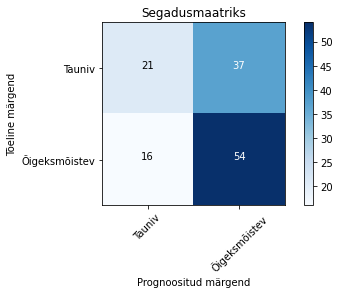

In [23]:
y_pred2 = []
for t in test_df:
    ennustus = model2.predict(t)[0][0]
    y_pred2.append(ennustus)
print(classification_report(y_test, y_pred2))
cm = metrics.confusion_matrix(y_test, y_pred2)
plot_confusion_matrix(cm, classes=['Tauniv', 'Õigeksmõistev'])

In [33]:
# Lemmad stoppsõnadega
model3 = fasttext.train_supervised(input = 'train_lemma_stop.txt',
                                  dim = 300,
                                  lr = 1,
                                  epoch = 25,
                                  pretrainedVectors='wiki.et.vec')

                        precision    recall  f1-score   support

       __label__tauniv       0.65      0.48      0.55        58
__label__õigeksmõistev       0.65      0.79      0.71        70

             micro avg       0.65      0.65      0.65       128
             macro avg       0.65      0.63      0.63       128
          weighted avg       0.65      0.65      0.64       128

Normaliseerimata segadusmaatriks


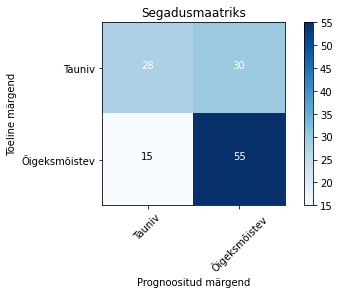

In [34]:
y_pred3 = []
for t in test_df:
    ennustus = model3.predict(t)[0][0]
    y_pred3.append(ennustus)
print(classification_report(y_test, y_pred3))
cm = metrics.confusion_matrix(y_test, y_pred3)
plot_confusion_matrix(cm, classes=['Tauniv', 'Õigeksmõistev'])

In [36]:
d = {'ennustus': y_pred3, 'tegelik': y_test, 'test_tekst': test_df}
df = pd.DataFrame(data=d)

In [37]:
df

,ennustus,tegelik,test_tekst
631,__label__õigeksmõistev,__label__õigeksmõistev,kolm aasta mait metsamaa surm armastama naine ...
527,__label__õigeksmõistev,__label__õigeksmõistev,eesti autor ühing eaü taotlema ringhääling sei...
315,__label__õigeksmõistev,__label__õigeksmõistev,15. oktoober toimuma hari maakohus istung osal...
612,__label__õigeksmõistev,__label__õigeksmõistev,kaitsevägi tellimus röövraie toimuma rahvusvah...
551,__label__tauniv,__label__tauniv,ämar vangla elektriauto vargus kahtlus sattuma...
...,...,...,...
442,__label__õigeksmõistev,__label__õigeksmõistev,kaheksa endine keskerakondlane teatama partei ...
597,__label__õigeksmõistev,__label__tauniv,mööduma reede kell 15.30 aeg üritama reformier...
319,__label__tauniv,__label__tauniv,ajaleht mk estonia peatoimetaja andrei titov v...
45,__label__õigeksmõistev,__label__õigeksmõistev,inimene maailm kaotama miljon dollar kuritegel...


In [38]:
df.to_csv('toofailid/fasttext_mudel.csv',index=False)
read_file = pd.read_csv (r'toofailid/fasttext_mudel.csv')
read_file.to_excel (r'toofailid/fasttext_mudel.xlsx', index = None, header=True)

In [60]:
t_t = df.loc[(df.ennustus == '__label__tauniv') & (df.tegelik == '__label__tauniv')]
t_o = df.loc[(df.ennustus == '__label__tauniv') & (df.tegelik == '__label__õigeksmõistev')]
o_t = df.loc[(df.ennustus == '__label__õigeksmõistev') & (df.tegelik == '__label__tauniv')]
o_o = df.loc[(df.ennustus == '__label__õigeksmõistev') & (df.tegelik == '__label__õigeksmõistev')]

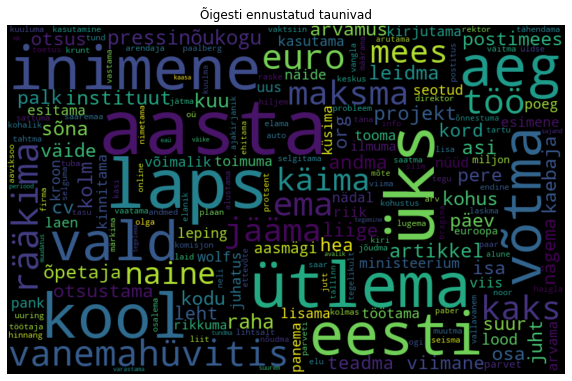

In [67]:
text_t_t = " ".join(review for review in t_t.test_tekst)
from wordcloud import WordCloud
#stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(text_t_t)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Õigesti ennustatud taunivad")
plt.show()

In [88]:
jaotus1 =pd.DataFrame(text_t_t.split(), columns=['sõna'])
tabel1 = jaotus1.groupby(['sõna']).size().reset_index(name='esinemissagedus').sort_values(by='esinemissagedus', ascending=False)[:50]
tabel1['osakaal %']= (tabel1['esinemissagedus']/len(text_t_t.split())*100)
tabel1_1 = tabel1.style.set_caption("Õigesti ennustatud taunivad")
tabel1_1

,sõna,esinemissagedus,osakaal %
201,aasta,110,0.867576
1712,laps,86,0.678287
4103,üks,83,0.654626
4145,ütlema,71,0.559981
1444,kool,70,0.552094
937,inimene,67,0.528433
219,aeg,58,0.457449
4009,võtma,53,0.418014
3733,vald,53,0.418014
3778,vanemahüvitis,52,0.410127


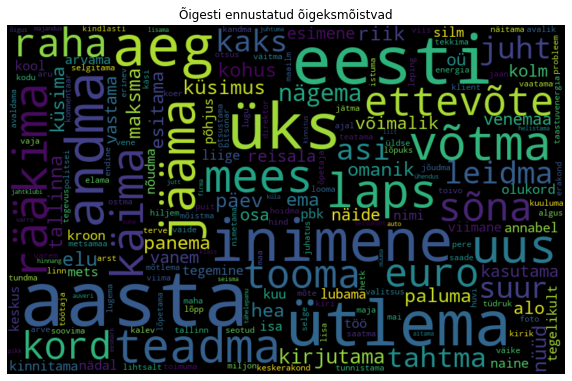

In [69]:
text_o_o = " ".join(review for review in o_o.test_tekst)
from wordcloud import WordCloud
#stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(text_o_o)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Õigesti ennustatud õigeksmõistvad")
plt.show()

In [91]:
jaotus2 =pd.DataFrame(text_o_o.split(), columns=['sõna'])
tabel2 = jaotus2.groupby(['sõna']).size().reset_index(name='esinemissagedus').sort_values(by='esinemissagedus', ascending=False)[:50]
tabel2['osakaal %']= (tabel2['esinemissagedus']/len(text_o_o.split())*100)
tabel2_1 = tabel2.style.set_caption("Õigesti ennustatud õigeksmõistvad")
tabel2_1

,sõna,esinemissagedus,osakaal %
315,aasta,271,0.887739
8791,üks,177,0.579815
8889,ütlema,177,0.579815
1088,eesti,163,0.533954
1990,inimene,148,0.484817
358,aeg,134,0.438956
539,andma,119,0.389819
2308,jääma,101,0.330855
8566,võtma,100,0.327579
7893,uus,96,0.314476


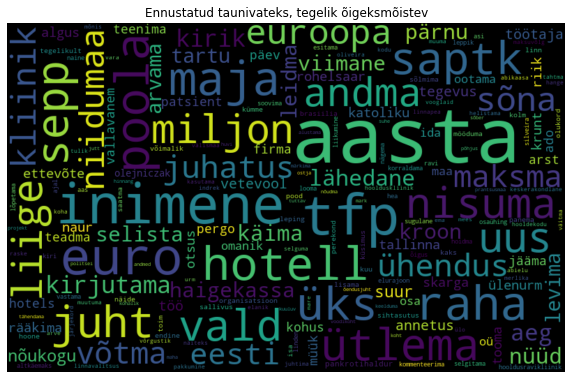

In [72]:
text_t_o = " ".join(review for review in t_o.test_tekst)
from wordcloud import WordCloud
#stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(text_t_o)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ennustatud taunivateks, tegelik õigeksmõistev")
plt.show()

In [92]:
jaotus3 =pd.DataFrame(text_t_o.split(), columns=['sõna'])
tabel3 = jaotus3.groupby(['sõna']).size().reset_index(name='esinemissagedus').sort_values(by='esinemissagedus', ascending=False)[:50]
tabel3['osakaal %']= (tabel3['esinemissagedus']/len(text_t_o.split())*100)
tabel3_1 = tabel3.style.set_caption("Ennustatud taunivateks, tegelik õigeksmõistev")
tabel3_1

,sõna,esinemissagedus,osakaal %
124,aasta,99,1.609756
595,inimene,43,0.699187
2027,tfp,42,0.682927
442,euro,37,0.601626
1667,raha,31,0.504065
1205,maja,31,0.504065
550,hotell,30,0.487805
2453,üks,29,0.471545
1780,saptk,28,0.455285
1823,sepp,27,0.439024


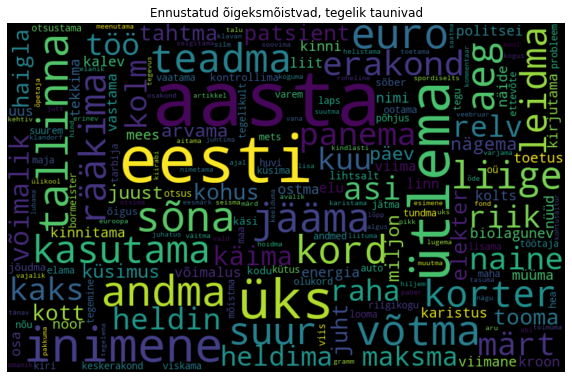

In [74]:
text_o_t = " ".join(review for review in o_t.test_tekst)
from wordcloud import WordCloud
#stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(text_o_t)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ennustatud õigeksmõistvad, tegelik taunivad")
plt.show()

In [93]:
jaotus4 =pd.DataFrame(text_o_t.split(), columns=['sõna'])
tabel4 = jaotus4.groupby(['sõna']).size().reset_index(name='esinemissagedus').sort_values(by='esinemissagedus', ascending=False)[:50]
tabel4['osakaal %']= (tabel4['esinemissagedus']/len(text_o_t.split())*100)
tabel4_1 = tabel4.style.set_caption("Ennustatud õigeksmõistvad, tegelik taunivad")
tabel4_1

,sõna,esinemissagedus,osakaal %
277,aasta,239,1.320369
716,eesti,141,0.778962
5782,ütlema,120,0.662947
5722,üks,110,0.607701
1296,inimene,85,0.469587
421,andma,65,0.359096
5605,võtma,64,0.353572
4509,sõna,64,0.353572
938,euro,61,0.336998
4622,tallinna,61,0.336998


In [102]:
t_t_list = jaotus1.sõna.to_list()
o_o_list = jaotus2.sõna.to_list()
t_o_list = jaotus3.sõna.to_list()
o_t_list = jaotus4.sõna.to_list()